In [11]:
# Reads anc baseline files
import pandas as pd

lse = "/Users/rafaelfrade/arquivos/desenv/lse"
baseline_survey = f"{lse}/anc_hiv_scheduling/data/baseline_survey"

hiv_baseline = pd.read_stata(f"{baseline_survey}/waiting_time_clinic_TC.dta")
hiv_baseline["facility_cod"] = hiv_baseline["id"]

treat_control = f"{lse}/adm_data/art_intervention/test/bases_auxiliares/treatment_hdd.dta"
tc_df = pd.read_stata(treat_control)
tc_df = tc_df[["facility_cod", "treatment"]]
tc_df["treatment_status"] = "treated"
tc_df.loc[tc_df["treatment"] == 0, "treatment_status"] = "control"


hiv_baseline = hiv_baseline.merge(tc_df, on="facility_cod")

In [15]:
hiv_baseline.groupby("treatment")["waiting_time_min"].mean()

treatment
0    112.245140
1     95.408333
Name: waiting_time_min, dtype: float32

In [17]:
path_hiv = "/Users/rafaelfrade/arquivos/desenv/lse/ocr_hiv"
hiv = pd.read_csv(f"{path_hiv}/hiv_endline_cleaned.csv")

In [27]:
hiv_pharmacy["code"].value_counts().head(20)

code
0460    12
0367     8
0320     8
0451     8
0512     8
0321     8
0425     8
0315     8
0412     8
0361     8
0480     5
0356     4
0514     4
0362     4
0355     4
0359     4
0507     4
0513     4
0509     4
0363     4
Name: count, dtype: int64

In [24]:
hiv_baseline["facility_cod"].unique().shape
#value_counts().head(20)

(53,)

In [30]:
hiv_pharmacy["clinic_name"].value_counts().head(20)

clinic_name
CS Mazivila                    48
Centro de Saude de Bagamoyo    45
CS Namaacha                    44
CS Mapinhane                   44
CS Urbano                      42
CS Maragra                     41
HR Manjacaze                   40
CS Tsalala                     40
CS Unidade 7                   40
CS de Chidenguele              40
CS Magude I                    40
CS Macia                       40
CS JNyerere                    40
CS Praia Bilene                40
Massinga CS I                  40
Inharrime CS I                 40
CS Ricatla                     36
CS Romao                       36
CS Eduardo Mondlane            36
CS Zandamela                   36
Name: count, dtype: int64

In [35]:
hiv_pharmacy.groupby("treatment")["num_wait7H"].mean()

treatment
Control      6.309795
Treatment    6.450098
Name: num_wait7H, dtype: float64

In [36]:
for i in range(7,16):
    col_name = f"num_wait{i}H"
    hiv_pharmacy[i] =  hiv_pharmacy[col_name]


In [43]:
hiv_pharmacy.groupby("treatment")[12].mean()

treatment
Control      4.547297
Treatment    4.736581
Name: 12, dtype: float64

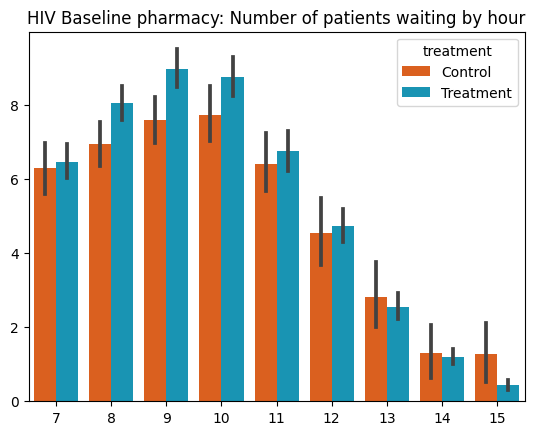

In [55]:
hours = hiv_pharmacy.melt(id_vars="treatment", value_vars=range(7,16))

import seaborn as sns 
import matplotlib.pyplot as plt

CONTROL = "#F95700FF"#"#ffc387"
TREATED = "#00A4CCFF"#"#9ed9c3"
palette_anc = [CONTROL, TREATED]
order=["Control","Treatment"]


sns.barplot(hours, x="variable", y="value",
            hue="treatment", palette=palette_anc)
plt.title("HIV Baseline pharmacy: Number of patients waiting by hour")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [56]:

hiv.groupby(pd.Grouper(freq='60Min', base=30, label='right'))

,file_name,facility,day,page,line,arrival_time,consultation_time,treatment,waiting_time,flag
0,endline_US1_day1_page3.txt,1,1,3,2,950,1015,0,25.0,0
1,endline_US1_day1_page3.txt,1,1,3,3,1015,1625,0,NaN,1
2,endline_US1_day1_page3.txt,1,1,3,4,1015,1027,0,12.0,0
3,endline_US1_day1_page3.txt,1,1,3,5,1020,1027,0,7.0,0
4,endline_US1_day1_page3.txt,1,1,3,6,1015,1032,0,17.0,0
...,...,...,...,...,...,...,...,...,...,...
22794,endline_US83_day12_page6.txt,83,12,6,2,1329,1334,0,5.0,0
22795,endline_US83_day12_page6.txt,83,12,6,3,1329,1334,0,5.0,0
22796,endline_US83_day12_page6.txt,83,12,6,4,1332,1335,0,3.0,0
22797,endline_US83_day12_page6.txt,83,12,6,5,1336,1340,0,4.0,0


In [65]:


def calc_hours_waiting(df):
    arrival_time = df["arrival_time"]
    consultation_time = df["consultation_time"]
    arrival_hour = round(arrival_time/100)
    consultation_hour = round(consultation_time/100)

    hours_waiting = range(arrival_hour, consultation_hour+1)
    return hours_waiting

In [87]:
hiv["hours_waiting"] = pd.NA
hours = []
for i, row in hiv.iterrows():
    arrival_time = row["arrival_time"]
    consultation_time = row["consultation_time"]

    arrival_hour = round(arrival_time/100)

    consultation_hour = round(consultation_time/100)
    hours_waiting = range(arrival_hour, consultation_hour+1)
    hours.append(list(hours_waiting))
hiv["hours"] = hours

In [119]:


wait = hiv.explode("hours")
wait = wait.query("hours > 5")
wait = wait.groupby(["facility","treatment","day","hours"])["hours"].count()

In [126]:
wait#.reset_index(drop=True)

facility  treatment  day  hours
1         0          1    6         2
                          7         2
                          8         2
                          9         2
                          10       10
                                   ..
83        0          12   9         3
                          10        3
                          11        4
                          12        7
                          13       10
Name: hours, Length: 984928, dtype: int64

In [118]:
wait["h"] = wait["hours"]

KeyError: 'hours'

In [117]:
wait = wait.rename(columns={"hours":"hours_"})

TypeError: rename() got an unexpected keyword argument 'columns'

In [115]:
wait

facility  treatment  day  hours
1         0          1    6         2
                          7         2
                          8         2
                          9         2
                          10       10
                                   ..
83        0          12   9         3
                          10        3
                          11        4
                          12        7
                          13       10
Name: hours, Length: 984928, dtype: int64

In [103]:
hiv.explode("hours")

,file_name,facility,day,page,line,arrival_time,consultation_time,treatment,waiting_time,flag,hours_waiting,hours
0,endline_US1_day1_page3.txt,1,1,3,2,950,1015,0,25.0,0,<NA>,10
1,endline_US1_day1_page3.txt,1,1,3,3,1015,1625,0,NaN,1,<NA>,10
1,endline_US1_day1_page3.txt,1,1,3,3,1015,1625,0,NaN,1,<NA>,11
1,endline_US1_day1_page3.txt,1,1,3,3,1015,1625,0,NaN,1,<NA>,12
1,endline_US1_day1_page3.txt,1,1,3,3,1015,1625,0,NaN,1,<NA>,13
...,...,...,...,...,...,...,...,...,...,...,...,...
22794,endline_US83_day12_page6.txt,83,12,6,2,1329,1334,0,5.0,0,<NA>,13
22795,endline_US83_day12_page6.txt,83,12,6,3,1329,1334,0,5.0,0,<NA>,13
22796,endline_US83_day12_page6.txt,83,12,6,4,1332,1335,0,3.0,0,<NA>,13
22797,endline_US83_day12_page6.txt,83,12,6,5,1336,1340,0,4.0,0,<NA>,13
